In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.3
2.4


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [4]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [5]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [6]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [7]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A1 Expected Annual Damage 0', variable_name=['A.1_Expected Annual Damage 0'], function=<function sum_over at 0x0000029A0BE3B708>)
ScalarOutcome('A2 Expected Annual Damage 0', variable_name=['A.2_Expected Annual Damage 0'], function=<function sum_over at 0x0000029A0BE3B708>)
ScalarOutcome('A3 Expected Annual Damage 0', variable_name=['A.3_Expected Annual Damage 0'], function=<function sum_over at 0x0000029A0BE3B708>)
ScalarOutcome('A1 Expected Number of Deaths 0', variable_name=['A.1_Expected Number of Deaths 0'], function=<function sum_over at 0x0000029A0BE3B708>)
ScalarOutcome('A2 Expected Number of Deaths 0', variable_name=['A.2_Expected Number of Deaths 0'], function=<function sum_over at 0x0000029A0BE3B708>)
ScalarOutcome('A3 Expected Number of Deaths 0', variable_name=['A.3_Expected Number of Deaths 0'], function=<function sum_over at 0x0000029A0BE3B708>)
ScalarOutcome('A1 Dike Investment Costs 0', variable_name=['A.1_Dike Investment Costs 0'], function=<function su

In [8]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=5, policies=4)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 5 scenarios * 4 policies * 1 model(s) = 20 experiments
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 12 cases completed
[MainProcess/INFO] 14 cases completed
[MainProcess/INFO] 16 cases completed
[MainProcess/INFO] 18 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A1 Expected Annual Damage 0', 'A2 Expected Annual Damage 0', 'A3 Expected Annual Damage 0', 'A1 Expected Number of Deaths 0', 'A2 Expected Number of Deaths 0', 'A3 Expected Number of Deaths 0', 'A1 Dike Investment Costs 0', 'A2 Dike Investment Costs 0', 'A3 Dike Investment Costs 0', 'RfR Total Costs 0', 'Expected Evacuation Costs 0', 'A1 Expected Annual Damage 1', 'A2 Expected Annual Damage 1', 'A3 Expected Annual Damage 1', 'A1 Expected Number of Deaths 1', 'A2 Expected Number of Deaths 1', 'A3 Expected Number of Deaths 1', 'A1 Dike Investment Costs 1', 'A2 Dike Investment Costs 1', 'A3 Dike Investment Costs 1', 'RfR Total Costs 1', 'Expected Evacuation Costs 1', 'A1 Expected Annual Damage 2', 'A2 Expected Annual Damage 2', 'A3 Expected Annual Damage 2', 'A1 Expected Number of Deaths 2', 'A2 Expected Number of Deaths 2', 'A3 Expected Number of Deaths 2', 'A1 Dike Investment Costs 2', 'A2 Dike Investment Costs 2', 'A3 Dike Investment Costs 2', 'RfR Total Costs 2', 'Expected

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,2.0,345.133605,1.5,0.841552,268.518311,10,0.561256,308.118900,1.5,0.376997,...,0.0,10.0,0.0,1.0,8.0,6.0,4.0,0,0,dikesnet
1,124.0,76.166771,1,0.715691,104.861007,1,0.672571,99.098550,1.5,0.944777,...,0.0,10.0,0.0,1.0,8.0,6.0,4.0,1,0,dikesnet
2,39.0,225.142214,10,0.437366,74.086078,10,0.016992,273.419898,10,0.675845,...,0.0,10.0,0.0,1.0,8.0,6.0,4.0,2,0,dikesnet
3,59.0,134.507457,1.5,0.192186,163.431446,1,0.366345,71.423123,1,0.090047,...,0.0,10.0,0.0,1.0,8.0,6.0,4.0,3,0,dikesnet
4,84.0,193.241537,10,0.385943,315.011325,1.5,0.916419,193.458822,1.5,0.537991,...,0.0,10.0,0.0,1.0,8.0,6.0,4.0,4,0,dikesnet
5,2.0,345.133605,1.5,0.841552,268.518311,10,0.561256,308.118900,1.5,0.376997,...,7.0,4.0,4.0,5.0,7.0,10.0,2.0,0,1,dikesnet
6,124.0,76.166771,1,0.715691,104.861007,1,0.672571,99.098550,1.5,0.944777,...,7.0,4.0,4.0,5.0,7.0,10.0,2.0,1,1,dikesnet
7,39.0,225.142214,10,0.437366,74.086078,10,0.016992,273.419898,10,0.675845,...,7.0,4.0,4.0,5.0,7.0,10.0,2.0,2,1,dikesnet
8,59.0,134.507457,1.5,0.192186,163.431446,1,0.366345,71.423123,1,0.090047,...,7.0,4.0,4.0,5.0,7.0,10.0,2.0,3,1,dikesnet
9,84.0,193.241537,10,0.385943,315.011325,1.5,0.916419,193.458822,1.5,0.537991,...,7.0,4.0,4.0,5.0,7.0,10.0,2.0,4,1,dikesnet


In [10]:
pd.DataFrame(data=outcomes)

,A1 Expected Annual Damage 0,A2 Expected Annual Damage 0,A3 Expected Annual Damage 0,A1 Expected Number of Deaths 0,A2 Expected Number of Deaths 0,A3 Expected Number of Deaths 0,A1 Dike Investment Costs 0,A2 Dike Investment Costs 0,A3 Dike Investment Costs 0,RfR Total Costs 0,...,A2 Expected Annual Damage 2,A3 Expected Annual Damage 2,A1 Expected Number of Deaths 2,A2 Expected Number of Deaths 2,A3 Expected Number of Deaths 2,A1 Dike Investment Costs 2,A2 Dike Investment Costs 2,A3 Dike Investment Costs 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,0.000000e+00,0.000000e+00,3.214828e+06,0.000000,0.000000,0.000672,8.526436e+07,4.784270e+07,2.029929e+07,236500000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,7.658707e+07,1.392848e+08,0,333100000.0,0.0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,8.526436e+07,4.784270e+07,2.029929e+07,236500000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,7.658707e+07,1.392848e+08,0,333100000.0,0.0
2,0.000000e+00,7.716991e+07,0.000000e+00,0.000000,0.007838,0.000000,8.526436e+07,4.784270e+07,2.029929e+07,236500000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,7.658707e+07,1.392848e+08,0,333100000.0,0.0
3,0.000000e+00,1.125762e+06,2.130592e+07,0.000000,0.000195,0.006475,8.526436e+07,4.784270e+07,2.029929e+07,236500000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,7.658707e+07,1.392848e+08,0,333100000.0,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,8.526436e+07,4.784270e+07,2.029929e+07,236500000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,7.658707e+07,1.392848e+08,0,333100000.0,0.0
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,6.813900e+07,9.952540e+07,3.728504e+07,589200000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,4.874446e+07,7.580531e+07,73190421,710400000.0,0.0
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,6.813900e+07,9.952540e+07,3.728504e+07,589200000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,4.874446e+07,7.580531e+07,73190421,710400000.0,0.0
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,6.813900e+07,9.952540e+07,3.728504e+07,589200000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,4.874446e+07,7.580531e+07,73190421,710400000.0,0.0
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,6.813900e+07,9.952540e+07,3.728504e+07,589200000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,4.874446e+07,7.580531e+07,73190421,710400000.0,0.0
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,6.813900e+07,9.952540e+07,3.728504e+07,589200000.0,...,0.000000e+00,0.0,0.0,0.000000,0.0,4.874446e+07,7.580531e+07,73190421,710400000.0,0.0


In [10]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

In [11]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 210 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 270 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


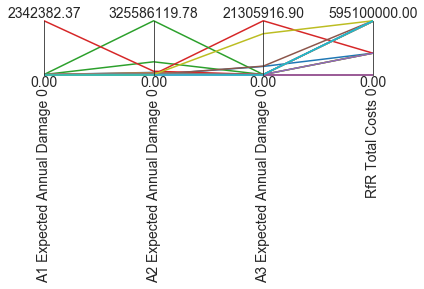

In [19]:
#plotting
from ema_workbench.analysis import parcoords
plot_results = pd.DataFrame(data = outcomes).loc[:, ['A1 Expected Annual Damage 0', 'A2 Expected Annual Damage 0', 'A3 Expected Annual Damage 0', 'RfR Total Costs 0']]

limits = parcoords.get_limits(plot_results)
axes = parcoords.ParallelAxes(limits)
axes.plot(plot_results)